In [11]:
import os
import pandas as pd




database = 'Diabetes'
#n , dimension = (6000, 123) 


path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/decomposition-measurement-ii/'
results_directory = path + f'results/{database}/'  # Replace this with the path to your directory
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
n_components_column_name = 'n-components'
total_training_time_mean_column = 'transform-and-training-time-mean'
total_training_time_std_column = 'transform-and-training-time-std'
# relevant column names 
transform_time_mean_column = 'transform-time-mean'
transform_time_std_column = 'transform-time-std'
training_time_mean_column = 'training-time-mean'
training_time_std_column = 'training-time-std'


# Get a list of all files in the directory
files = [file for file in os.listdir(results_directory) if os.path.isfile(os.path.join(results_directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
stats_files = [file for file in files if "stats" in file]
stats_files.sort() # kernel methods será el primero

kernel_files = [file for file in stats_files if ('kernel' in file and 'kernel-linear' not in file)]
random_features_files = [file for file in stats_files if file not in kernel_files]


# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    # mean
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    data['File'] = file  # Add a column to identify the file 
    # 
    data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
    data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

    random_features_data = pd.concat([random_features_data, data], ignore_index=True)
    random_features_list.append(data)
    random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

    data['File'] = file  # Add a column to identify the file
    data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
    data[total_training_time_mean_column] = data[training_time_mean_column]
    data[total_training_time_std_column] = data[training_time_std_column]

    kernel_data = pd.concat([kernel_data, data], ignore_index=True)
    kernel_list.append(data)
    kernel_list_names.append(file.replace('-stats.csv', ''))

print('Ridge files')
print(kernel_list_names)
print('kernel files')
print(kernel_list_names)
kernel_data



['Nystroem-SVC-kernel-linear-stats-a.csv', 'results.dict', 'Nystroem-linear-SVC-dual-false-stats-a.csv', 'RFF-linear-SVC-dual-false-stats-a.csv', 'kernel-SVC-verbose.csv', 'RFF-SVC-kernel-linear-stats-a.csv', 'RFF-verbose.csv', 'Nystroem-verbose.csv', 'kernel-SVC-stats.csv']
Ridge files
['kernel-SVC']
kernel files
['kernel-SVC']


,mean-refit-time-mean,mean-refit-time-std,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,0.004586,0.004586,0.444113,0.068641,0.017544,0.000269,0.813853,2.220446e-16,kernel-SVC-stats.csv,0.444113,0.068641


In [12]:
random_features_data

,n-components,fit-time-mean,fit-time-std,transform-time-mean,transform-time-std,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,5,0.000780,0.001341,0.000780,0.000006,0.002645,0.000267,0.000829,0.000038,0.748918,0.040610,Nystroem-SVC-kernel-linear-stats-a.csv,0.003425,0.000273
1,6,0.000292,0.000055,0.000292,0.000004,0.002675,0.000087,0.000854,0.000047,0.754484,0.044198,Nystroem-SVC-kernel-linear-stats-a.csv,0.002967,0.000092
2,7,0.000275,0.000039,0.000275,0.000005,0.002865,0.000108,0.000833,0.000042,0.781694,0.037575,Nystroem-SVC-kernel-linear-stats-a.csv,0.003141,0.000113
3,8,0.000276,0.000037,0.000276,0.000003,0.002755,0.000109,0.000807,0.000060,0.795300,0.023673,Nystroem-SVC-kernel-linear-stats-a.csv,0.003030,0.000112
4,9,0.000274,0.000021,0.000274,0.000008,0.002863,0.000169,0.000819,0.000019,0.807050,0.006545,Nystroem-SVC-kernel-linear-stats-a.csv,0.003137,0.000177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,67,0.000205,0.000130,0.000205,0.013640,0.002851,0.000359,0.002856,0.006901,0.799011,0.002314,RFF-linear-SVC-dual-false-stats-a.csv,0.003057,0.013999
108,70,0.000161,0.000029,0.000161,0.002247,0.002847,0.000192,0.000275,0.000063,0.797774,0.002112,RFF-linear-SVC-dual-false-stats-a.csv,0.003008,0.002439
109,74,0.000170,0.000040,0.000170,0.014705,0.003070,0.000245,0.000253,0.000043,0.800247,0.002987,RFF-linear-SVC-dual-false-stats-a.csv,0.003241,0.014950
110,77,0.000160,0.000024,0.000160,0.004601,0.003141,0.000336,0.000307,0.000111,0.797774,0.002112,RFF-linear-SVC-dual-false-stats-a.csv,0.003301,0.004937


In [13]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File", column, n_components_column_name]]
   
      return dataframe

In [14]:
# get columns to be plot
mean_columns_to_be_plot = [column for column in random_features_data.columns if 'mean' in column]
std_columns_to_be_plot = [column for column in random_features_data.columns if 'std' in column]


# Sort by score 

In [15]:
show_dataframe(random_features_data,'score-mean' , ascending=False, n_rows=10)

,File,score-mean,n-components
24,Nystroem-SVC-kernel-linear-stats-a.csv,0.814,70
27,Nystroem-SVC-kernel-linear-stats-a.csv,0.814,81
20,Nystroem-SVC-kernel-linear-stats-a.csv,0.814,57
19,Nystroem-SVC-kernel-linear-stats-a.csv,0.814,53
18,Nystroem-SVC-kernel-linear-stats-a.csv,0.814,50
...,...,...,...
85,RFF-linear-SVC-dual-false-stats-a.csv,0.753,6
0,Nystroem-SVC-kernel-linear-stats-a.csv,0.749,5
57,RFF-SVC-kernel-linear-stats-a.csv,0.733,6
84,RFF-linear-SVC-dual-false-stats-a.csv,0.732,5


# Plotting 

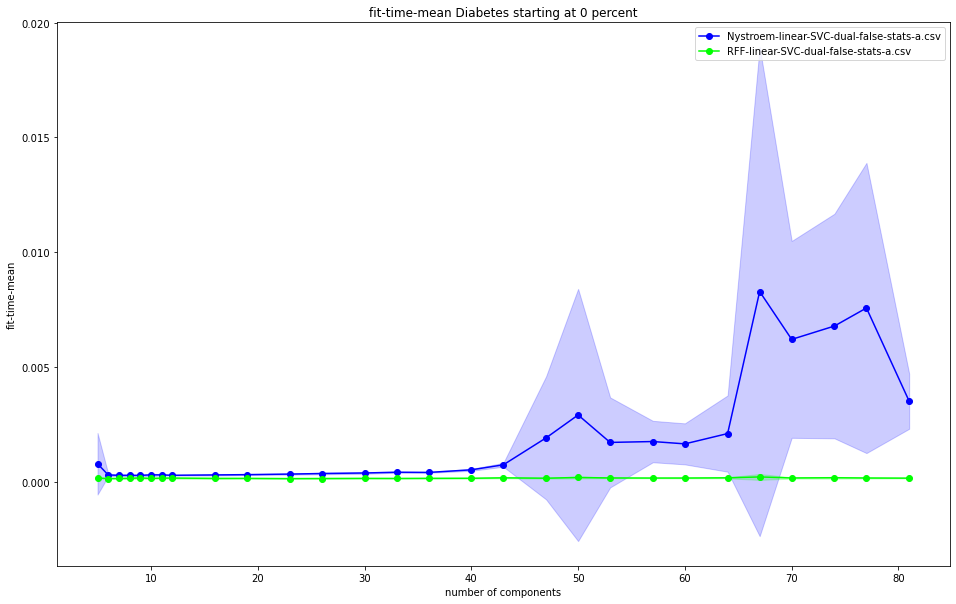

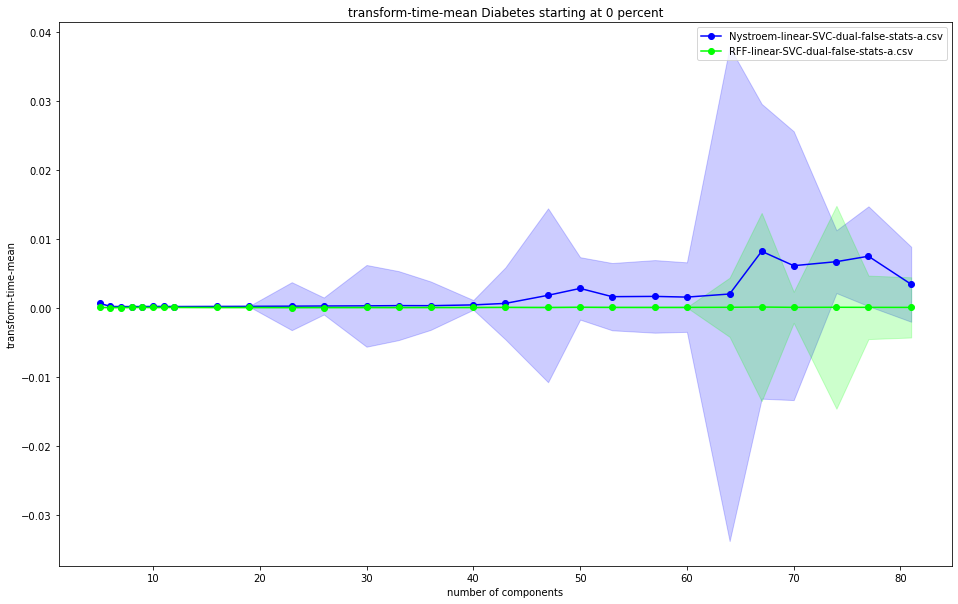

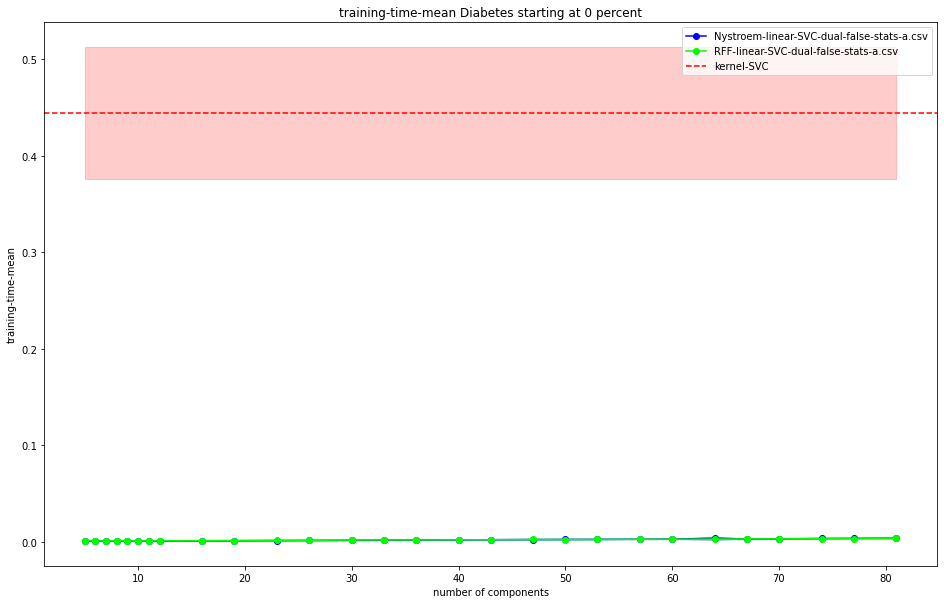

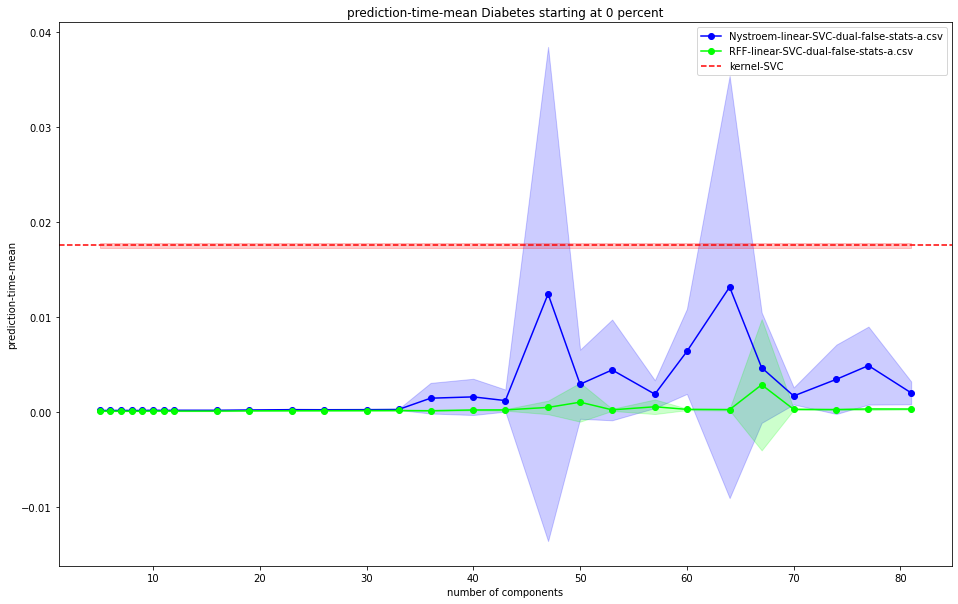

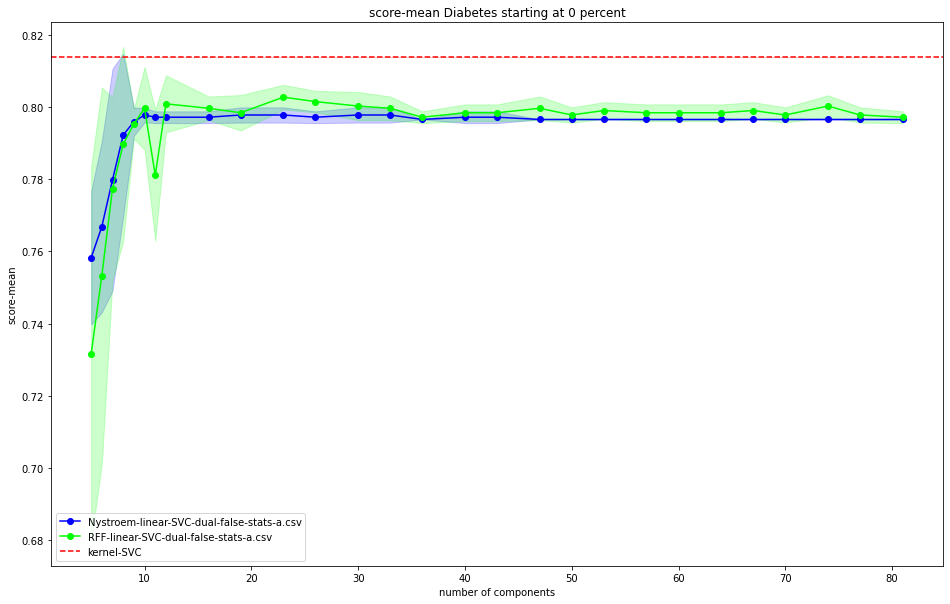

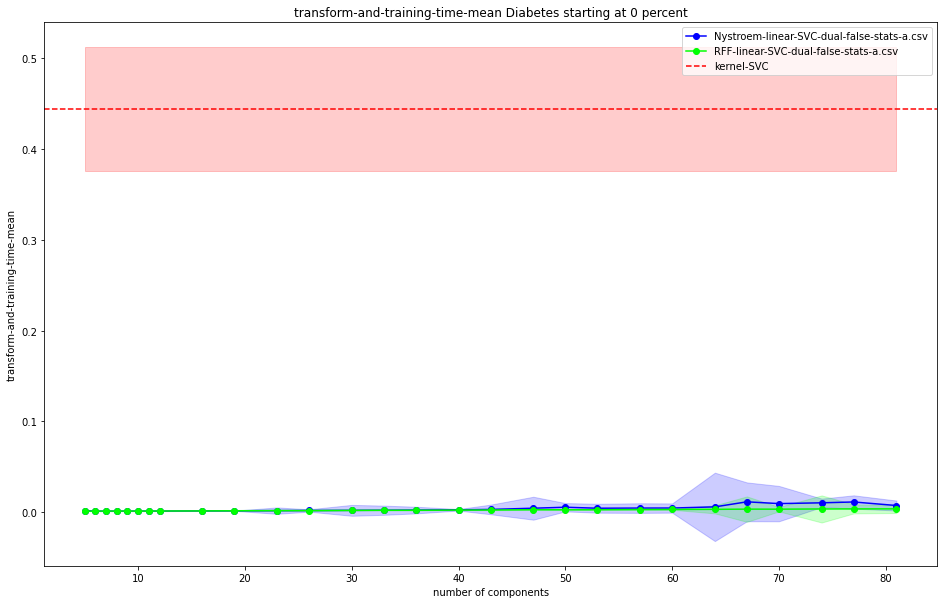

In [24]:

view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')

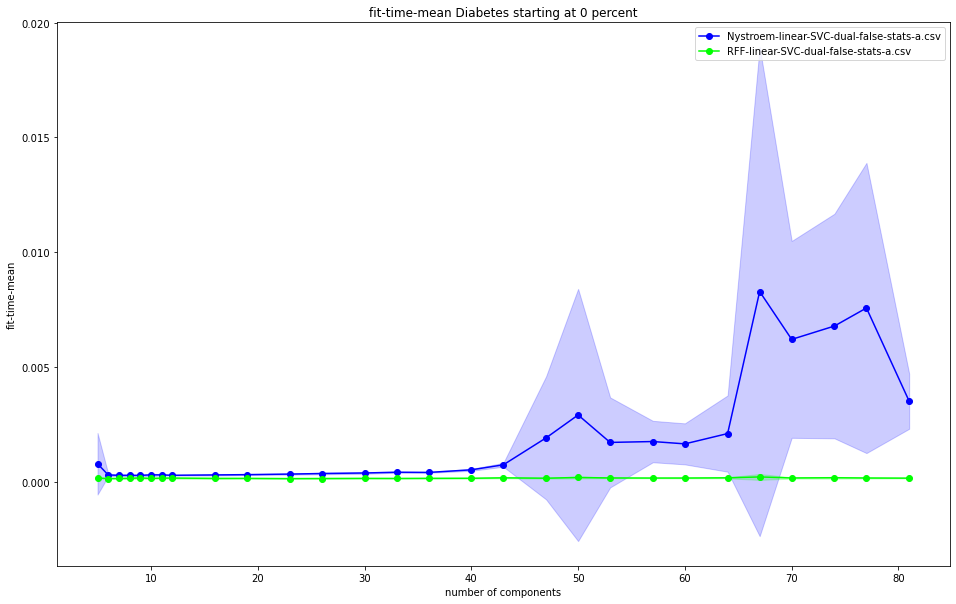

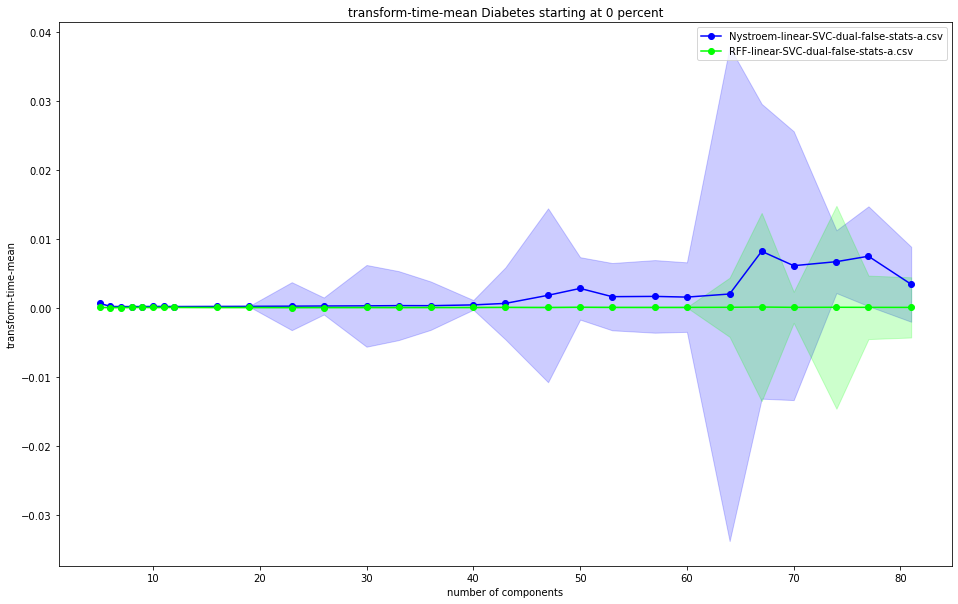

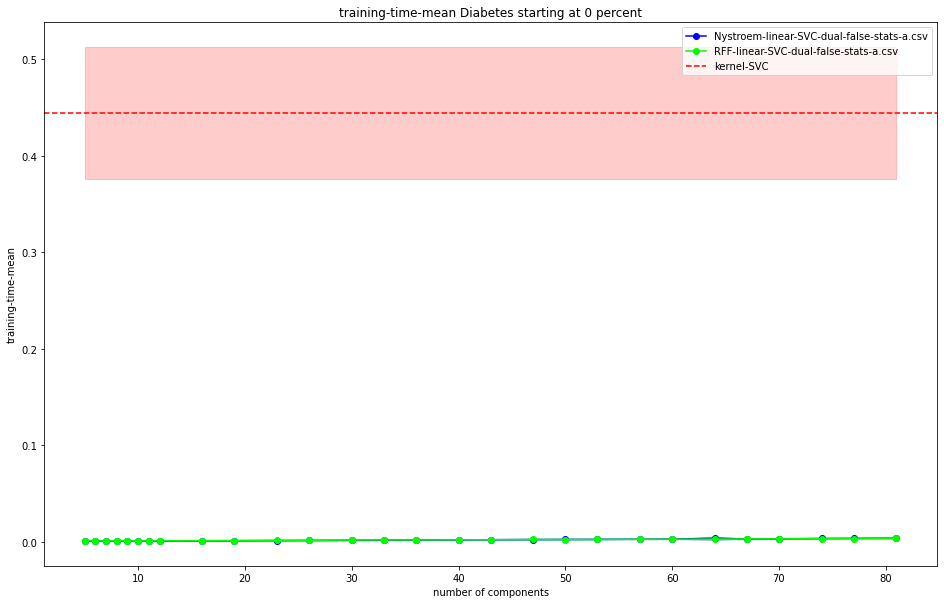

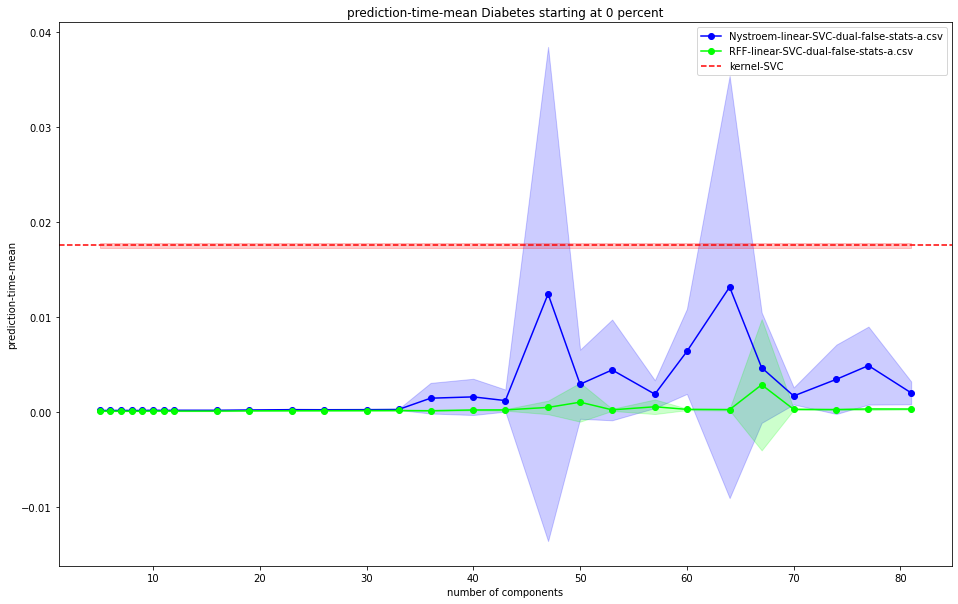

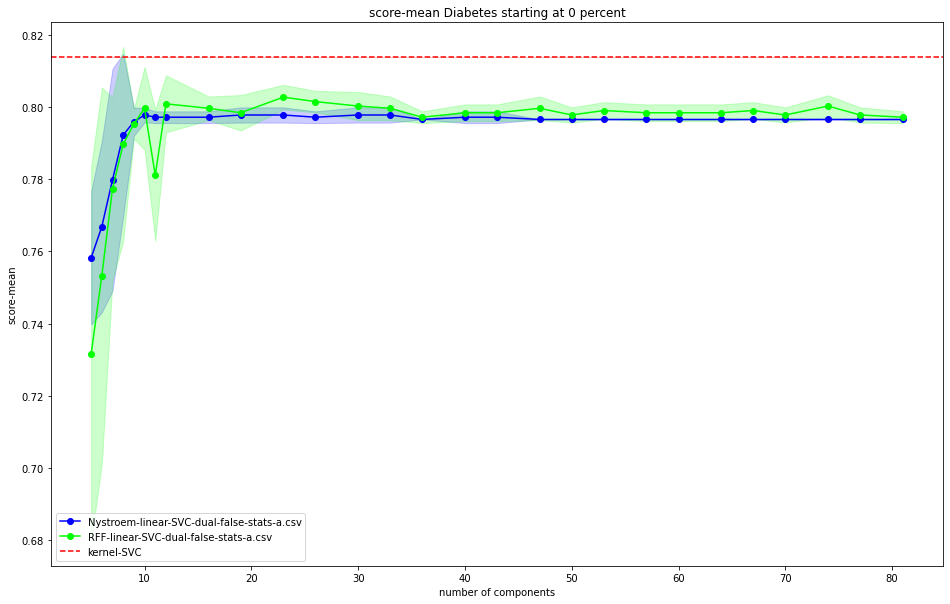

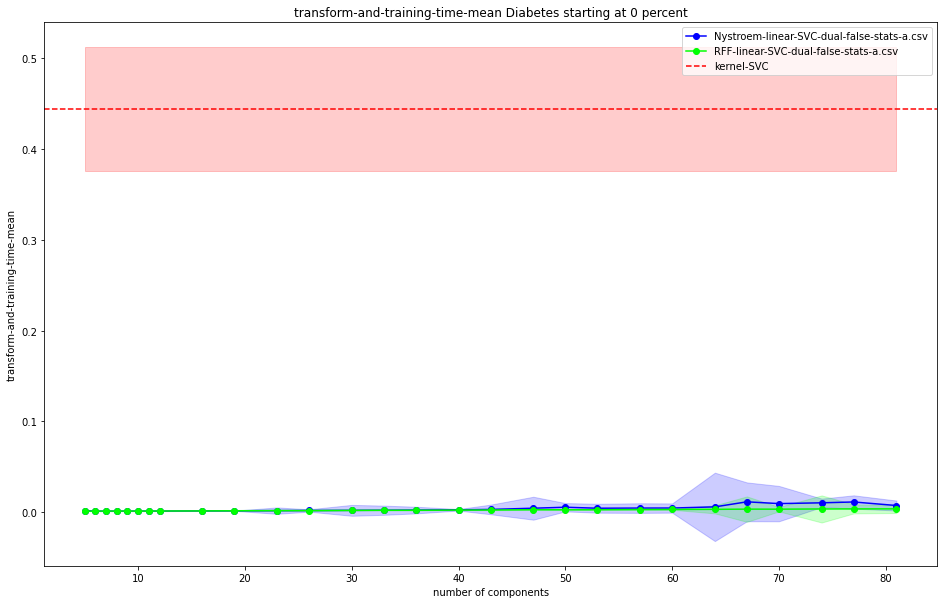

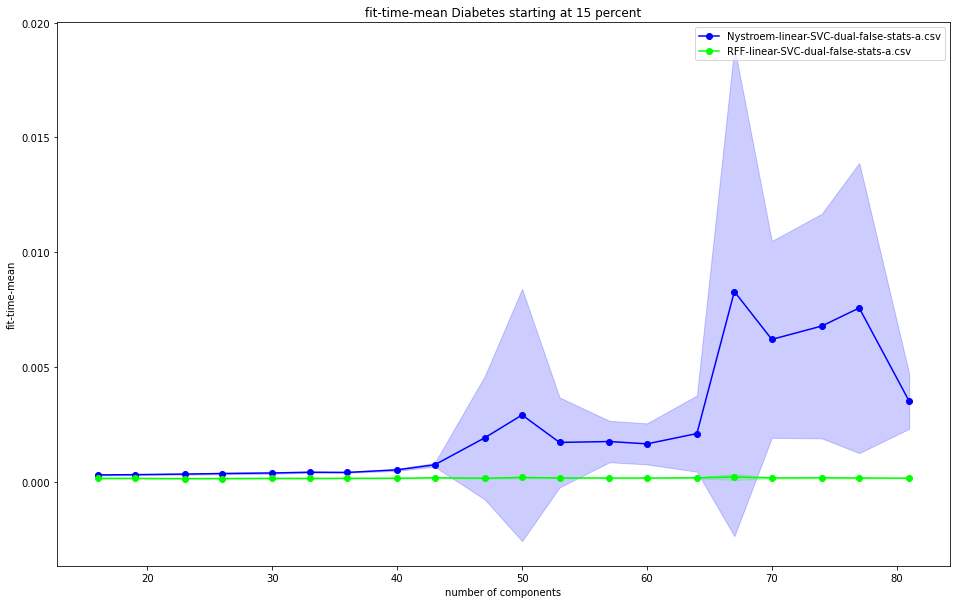

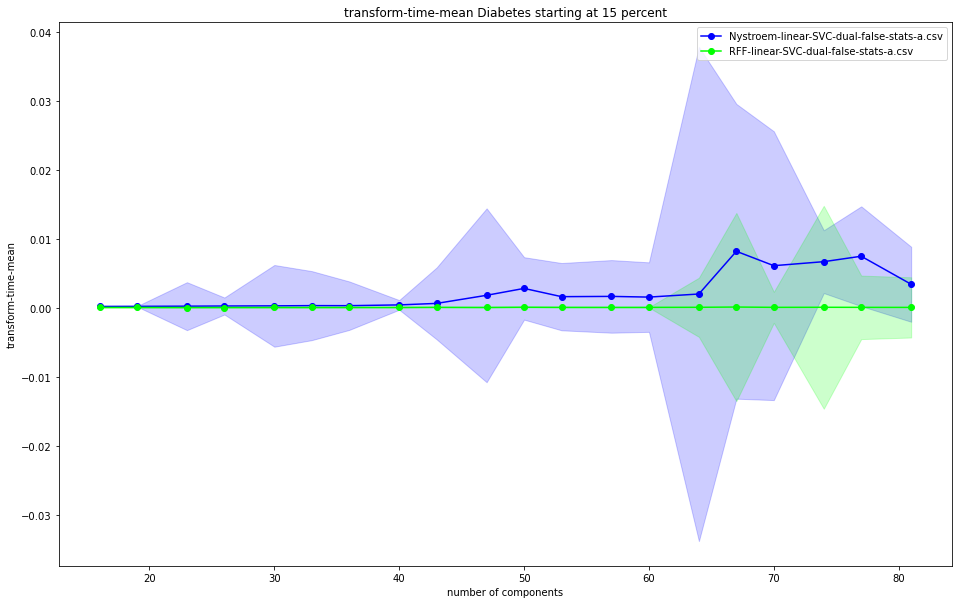

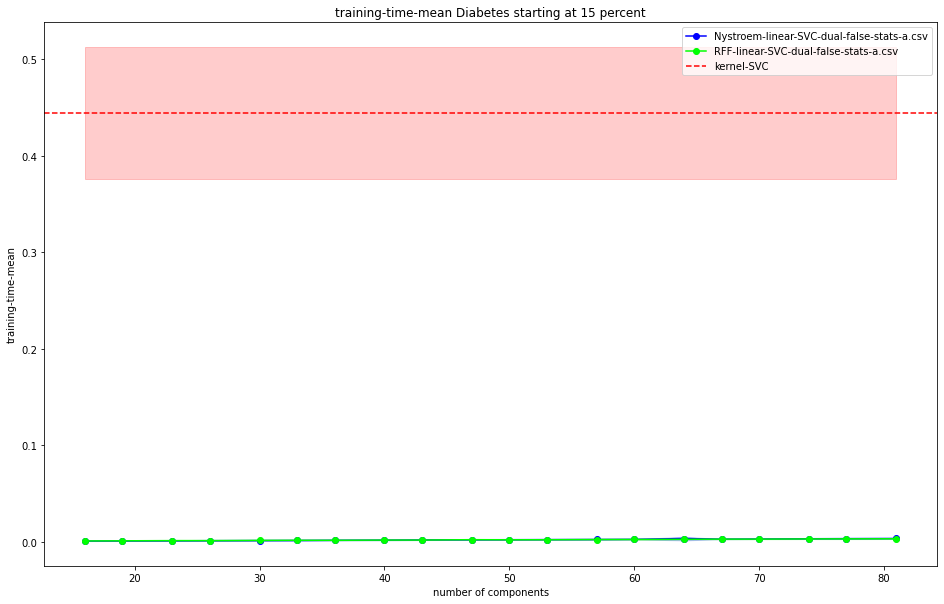

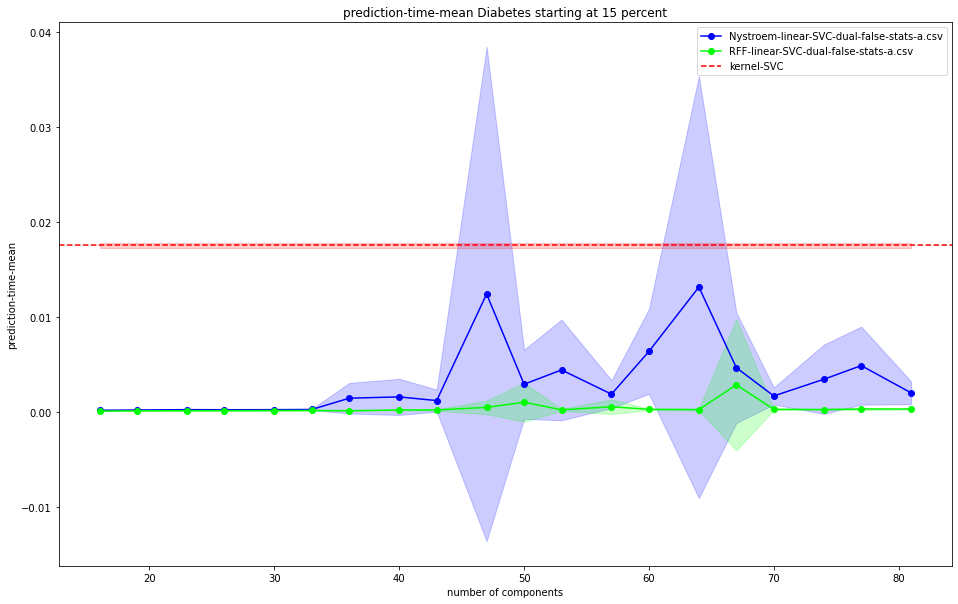

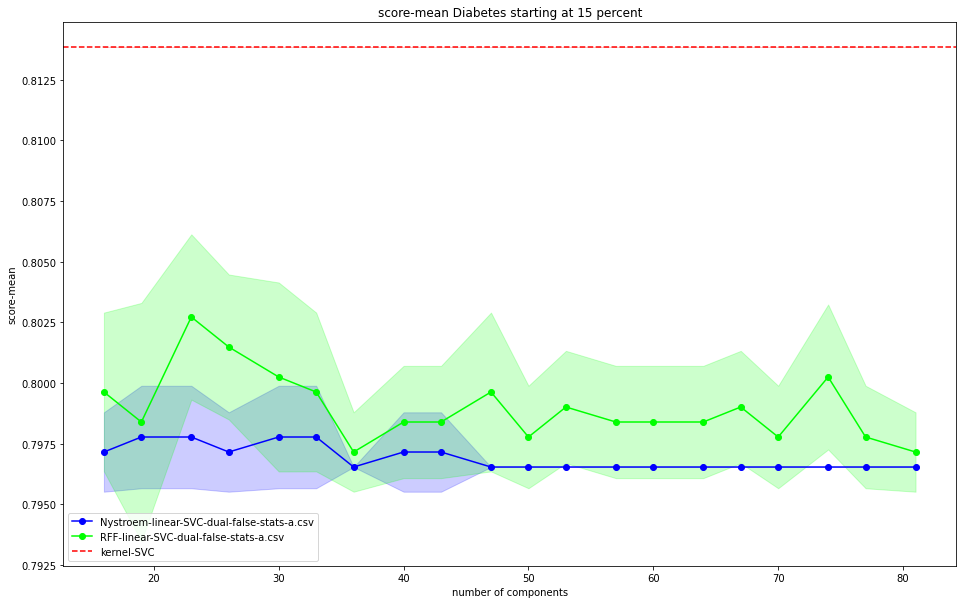

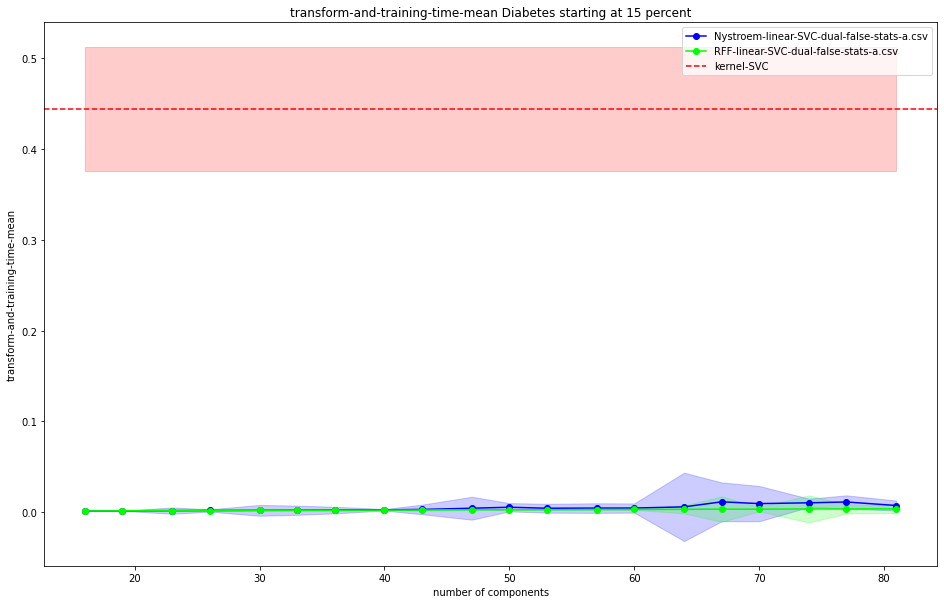

In [23]:
from plotting import view_plots_and_save_them


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')

view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 15,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')


In [17]:

# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    if not 'dual' in file:
        # mean
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
        #data[percent_column] = data.apply(compute_percent, axis=1)
        data['File'] = file  # Add a column to identify the file 
        # 
        data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
        data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

        random_features_data = pd.concat([random_features_data, data], ignore_index=True)
        random_features_list.append(data)
        random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    if not 'dual' in file:
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

        data['File'] = file  # Add a column to identify the file
        data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
        data[total_training_time_mean_column] = data[training_time_mean_column]
        data[total_training_time_std_column] = data[training_time_std_column]

        kernel_data = pd.concat([kernel_data, data], ignore_index=True)
        kernel_list.append(data)
        kernel_list_names.append(file.replace('-stats.csv', ''))


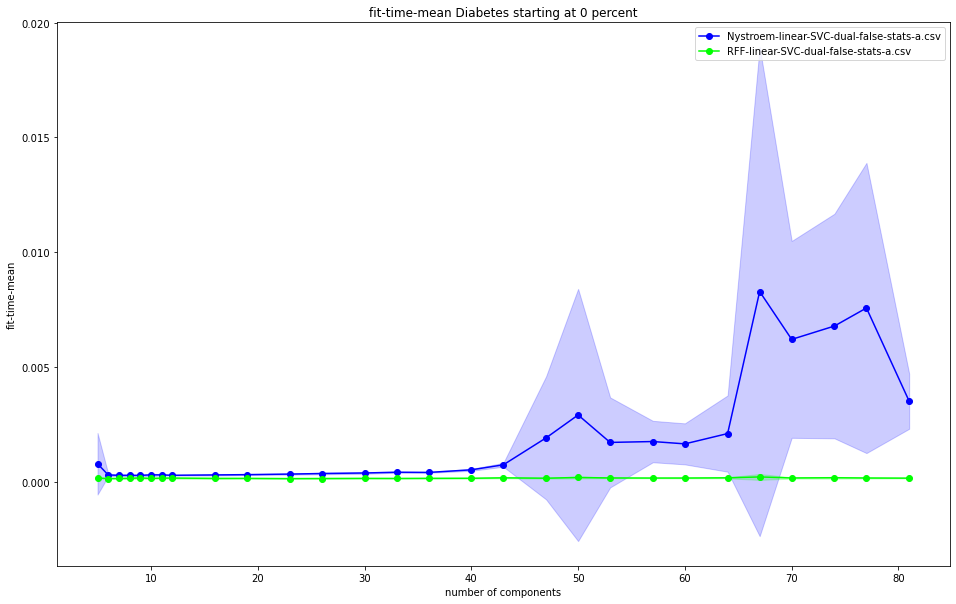

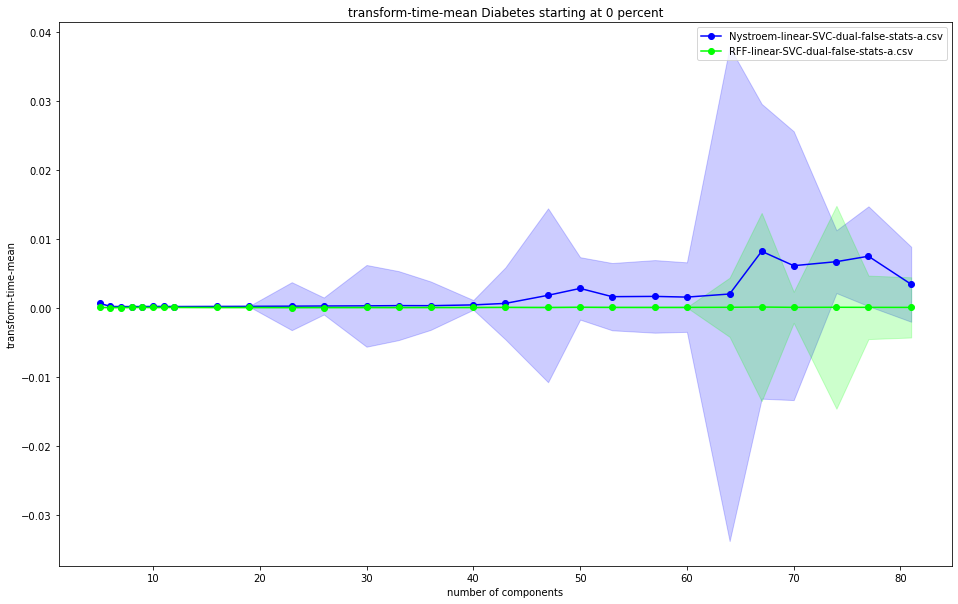

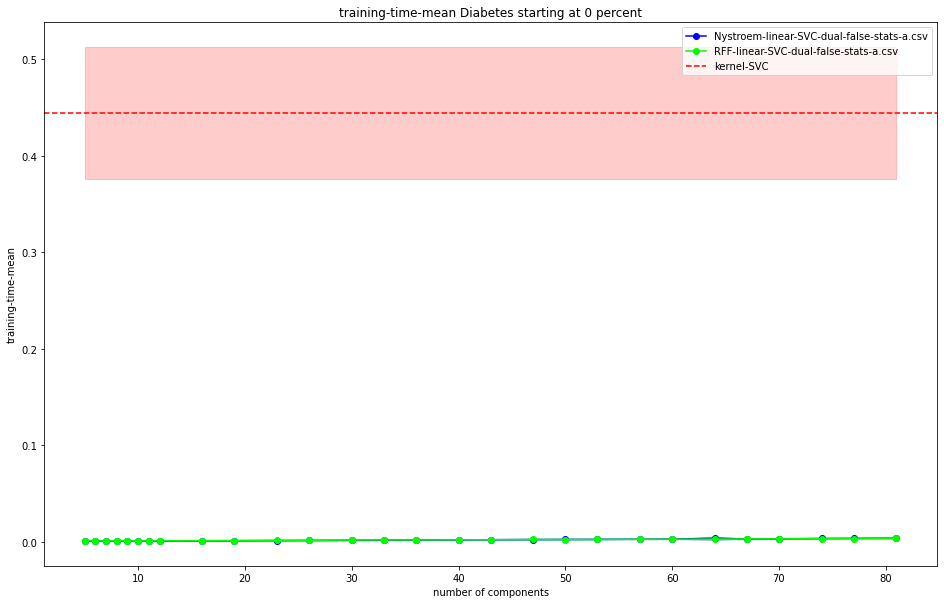

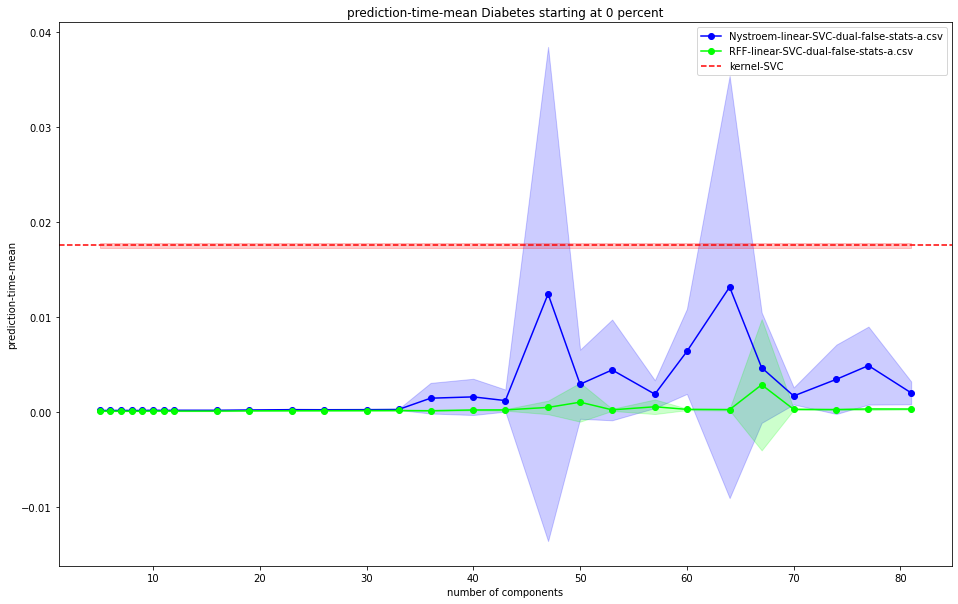

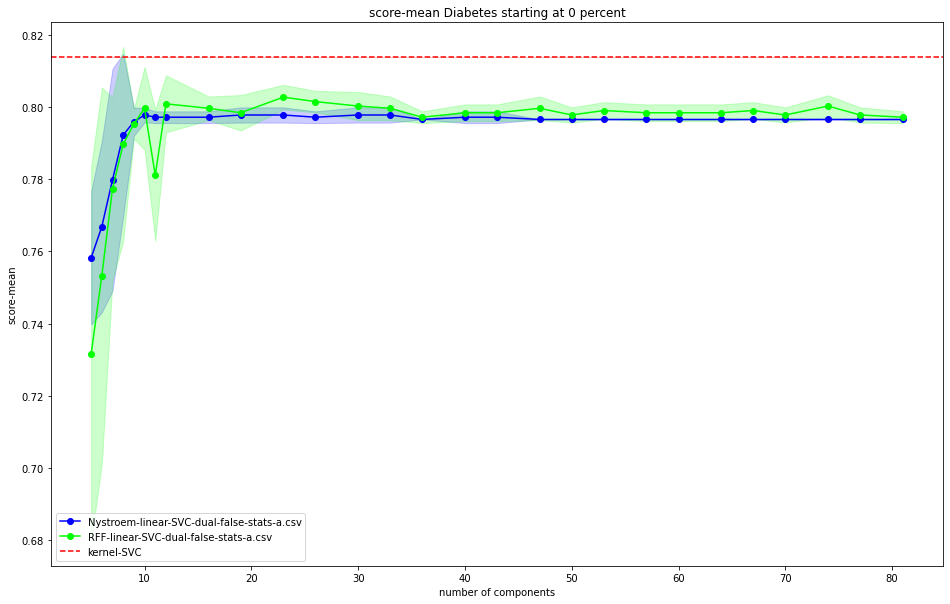

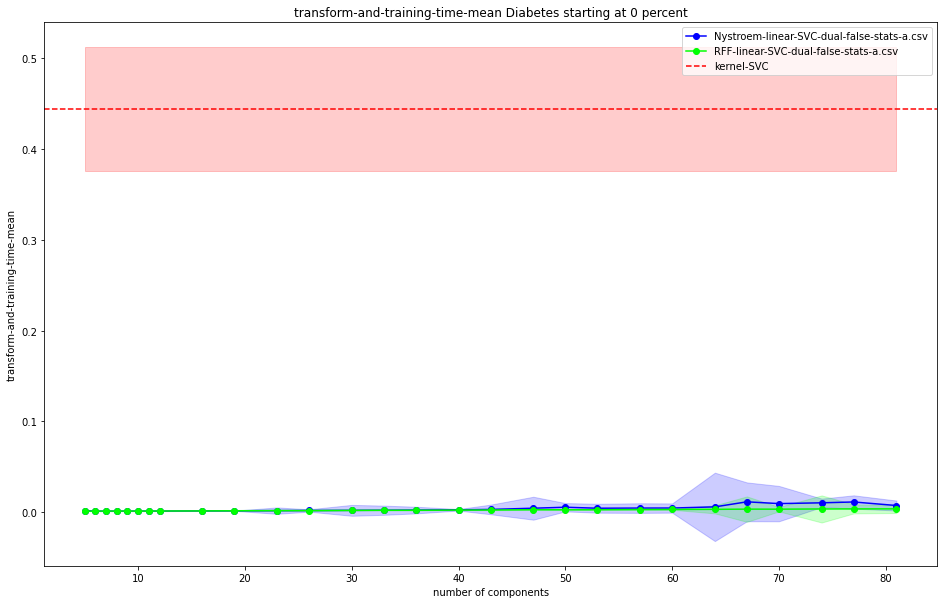

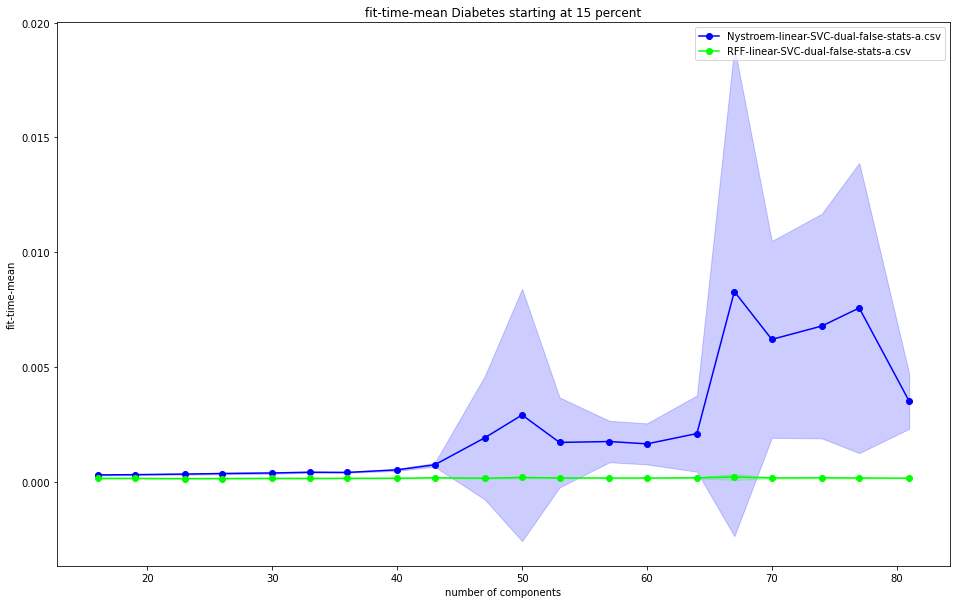

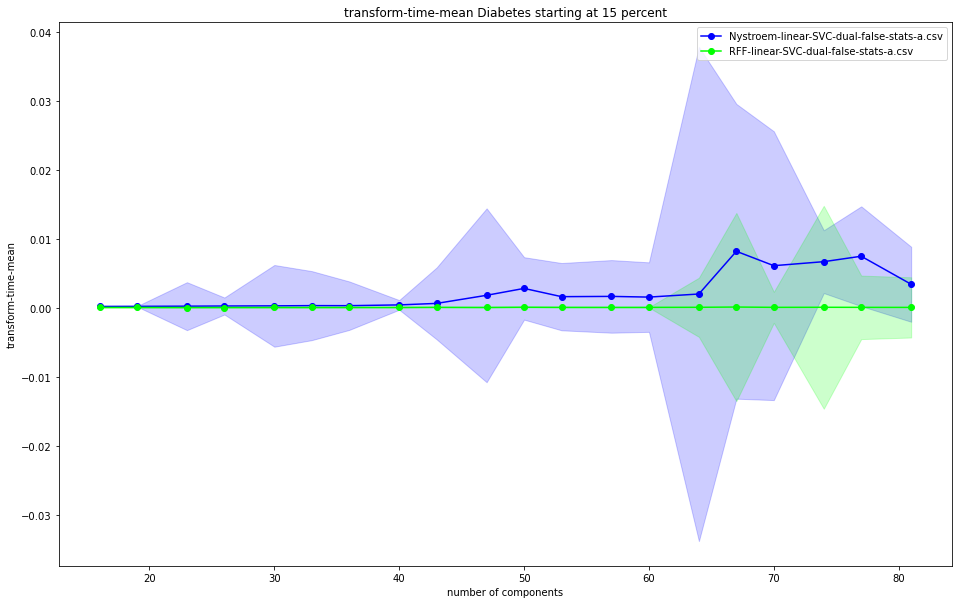

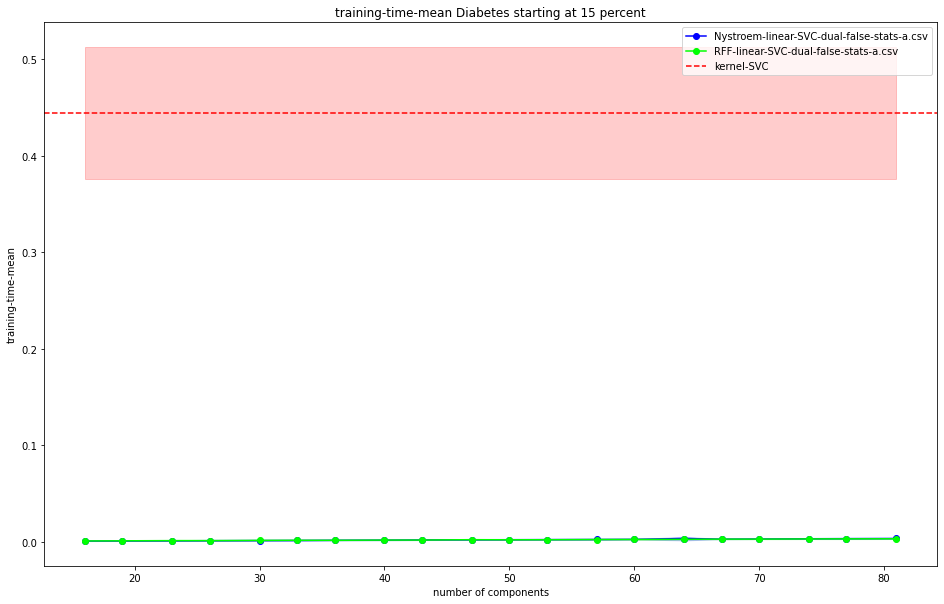

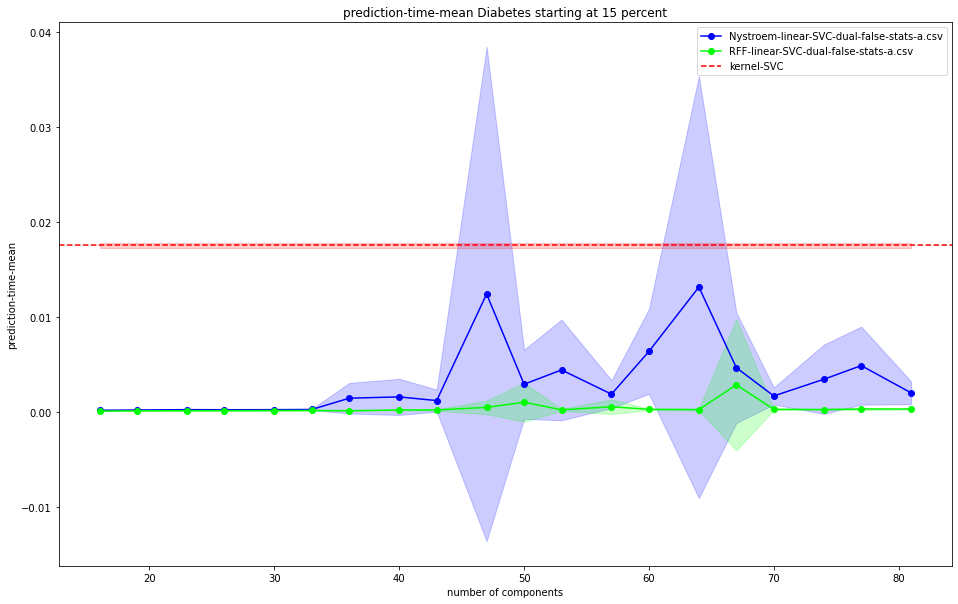

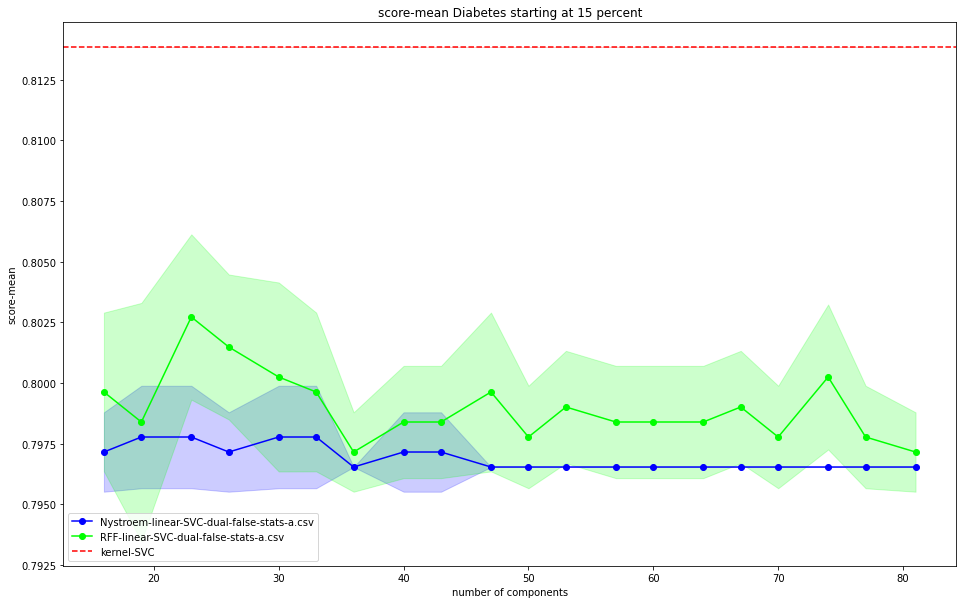

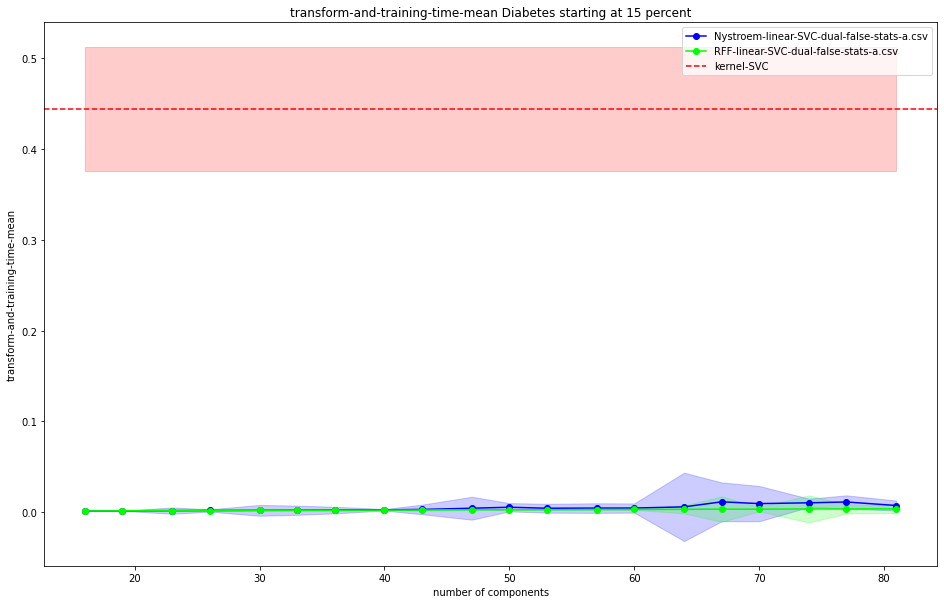

In [22]:
view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 15,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')


# Sin kernel

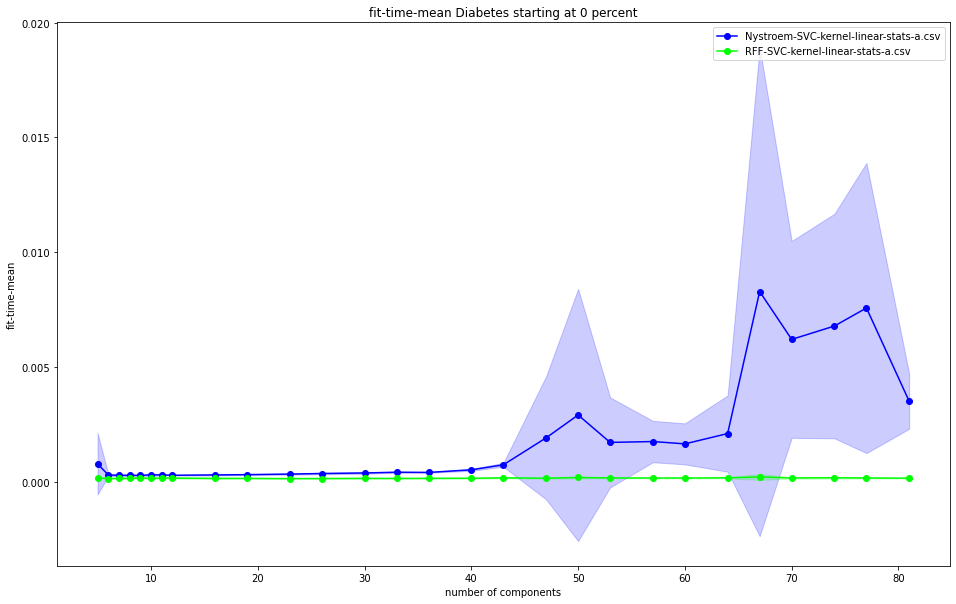

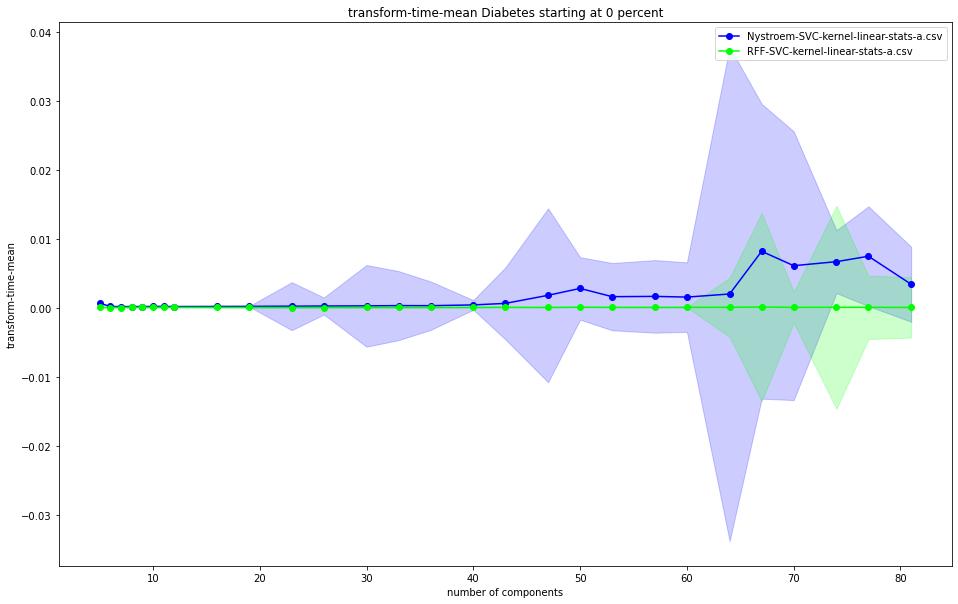

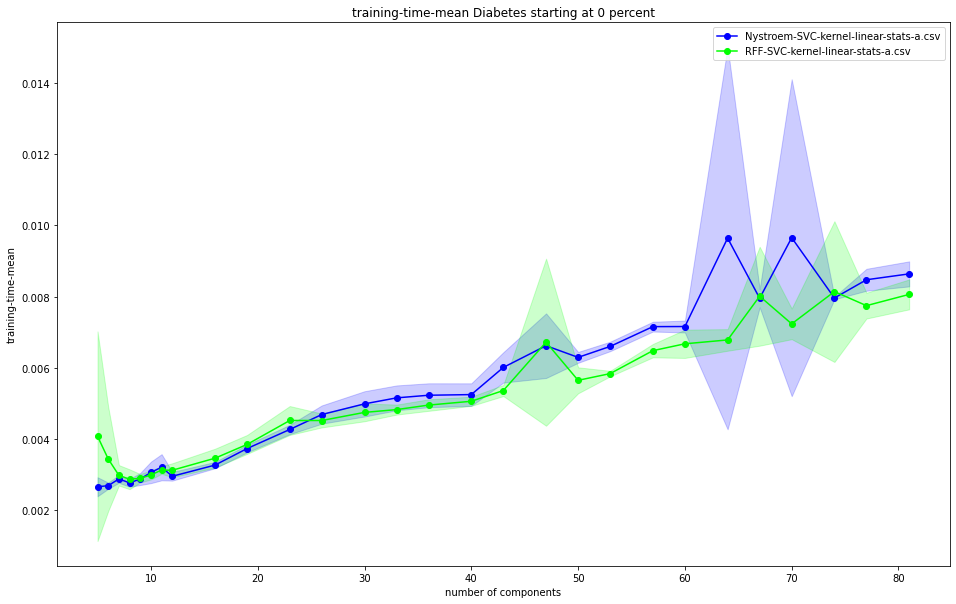

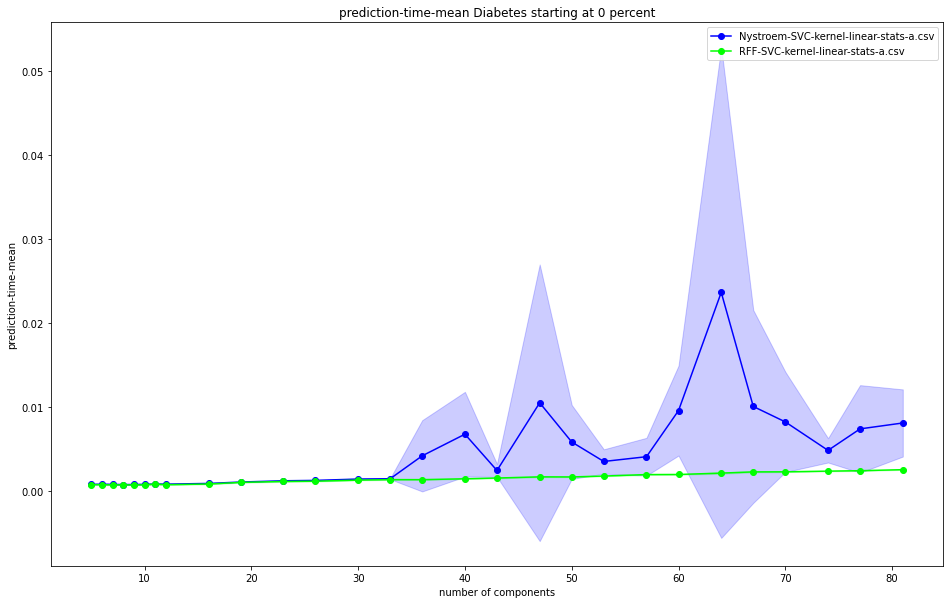

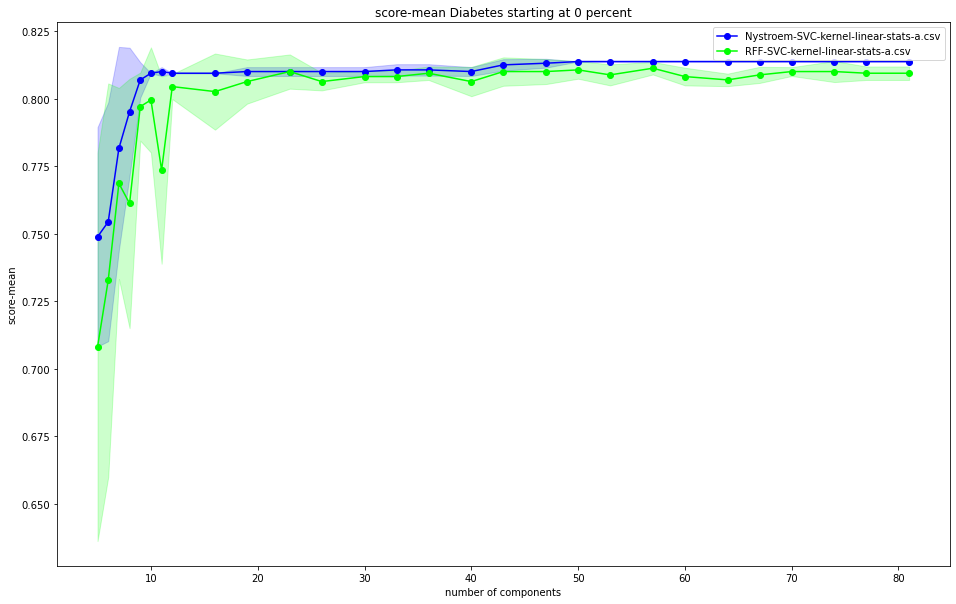

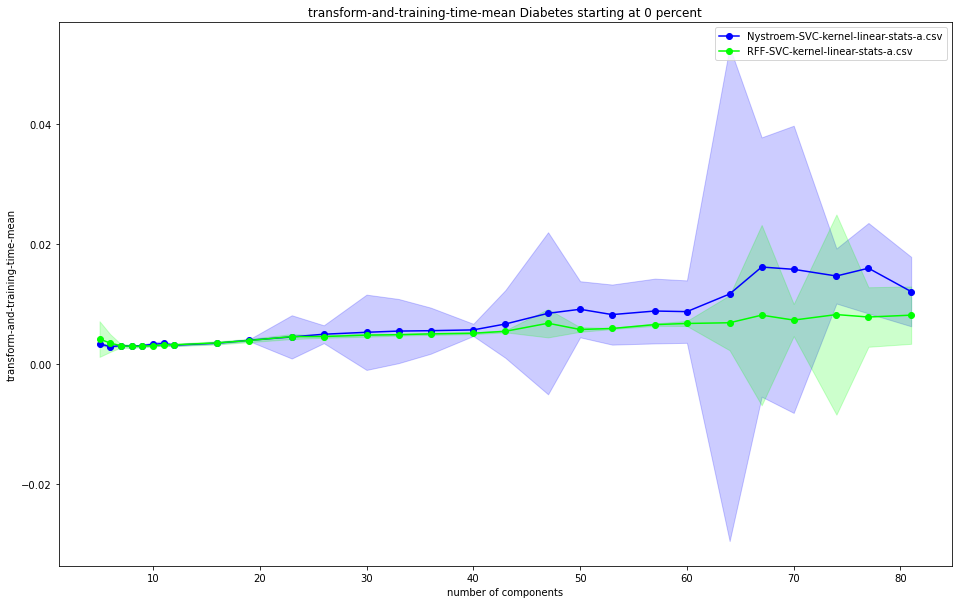

In [19]:
view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=[], constant_labels=[],
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')

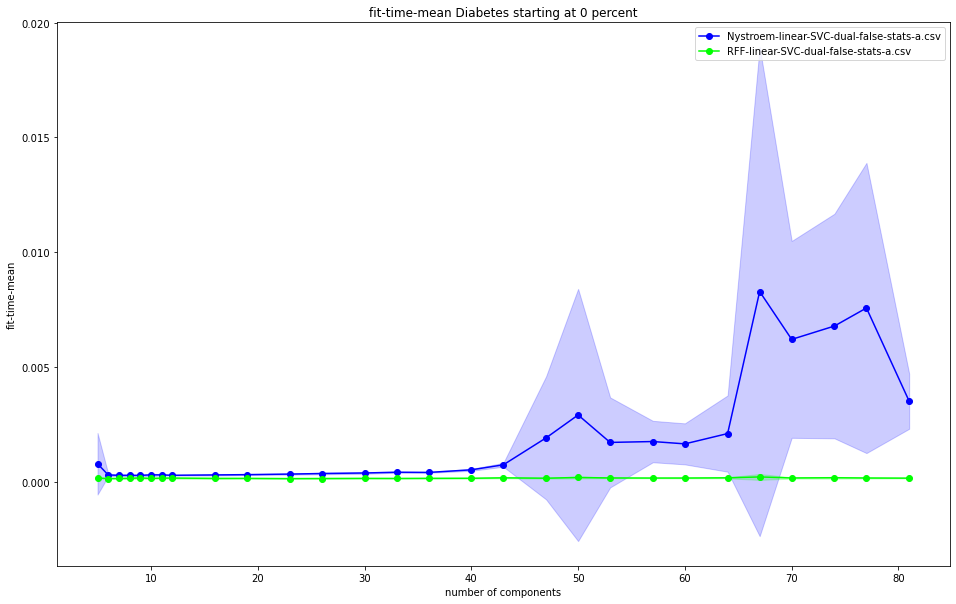

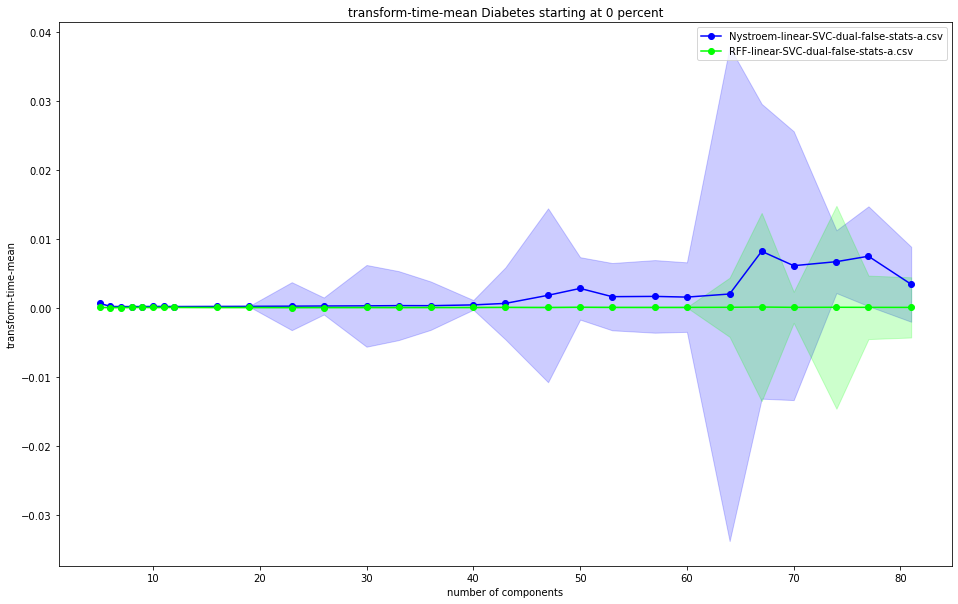

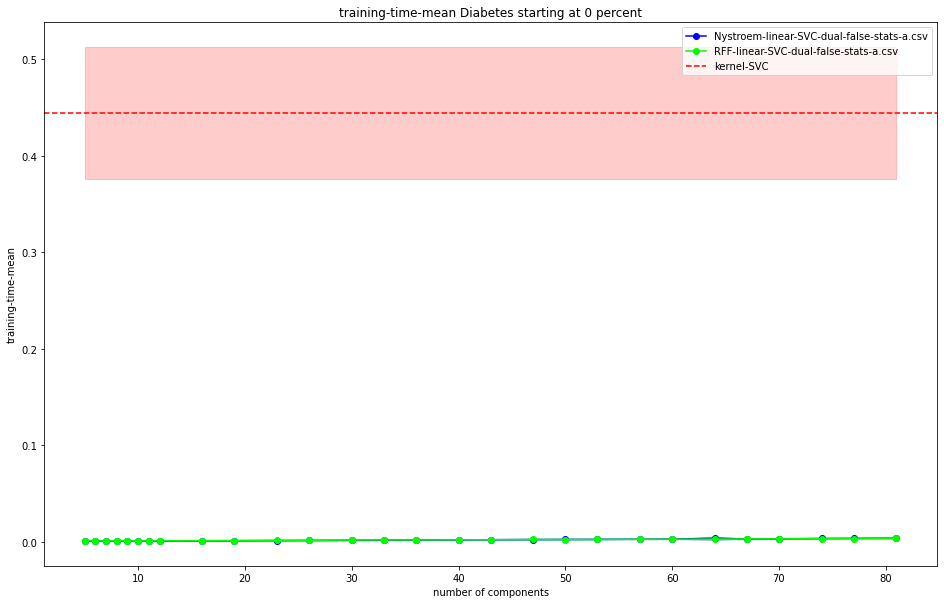

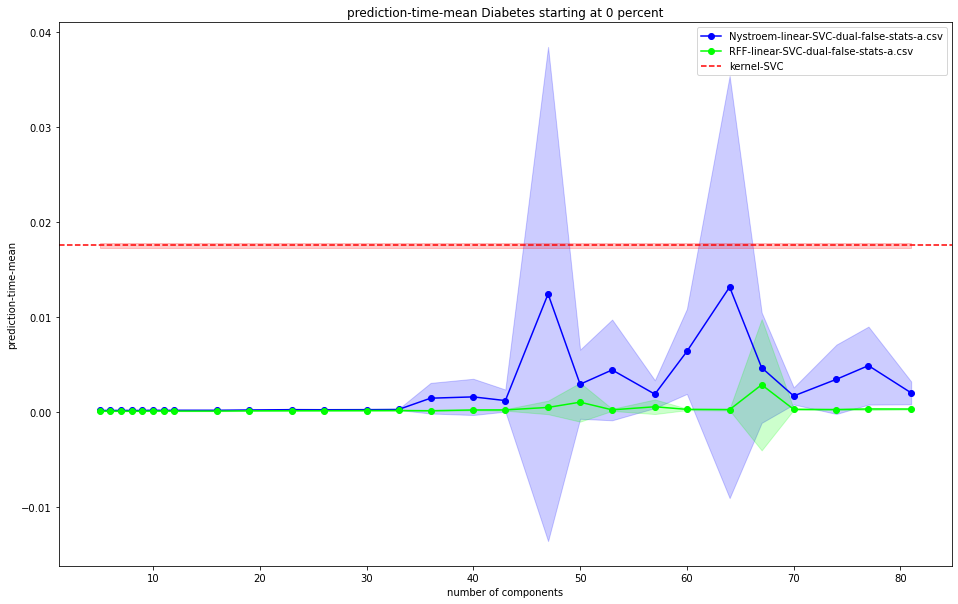

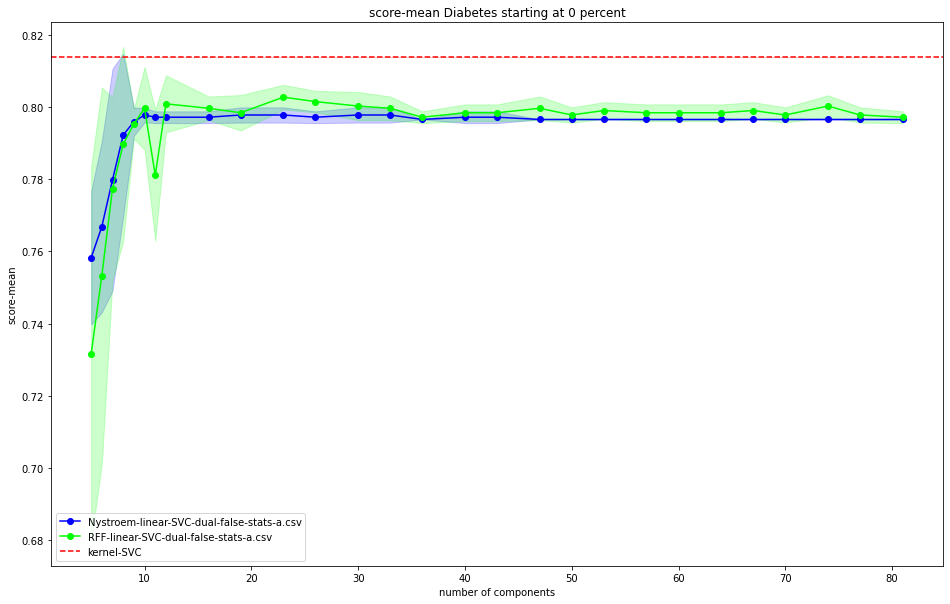

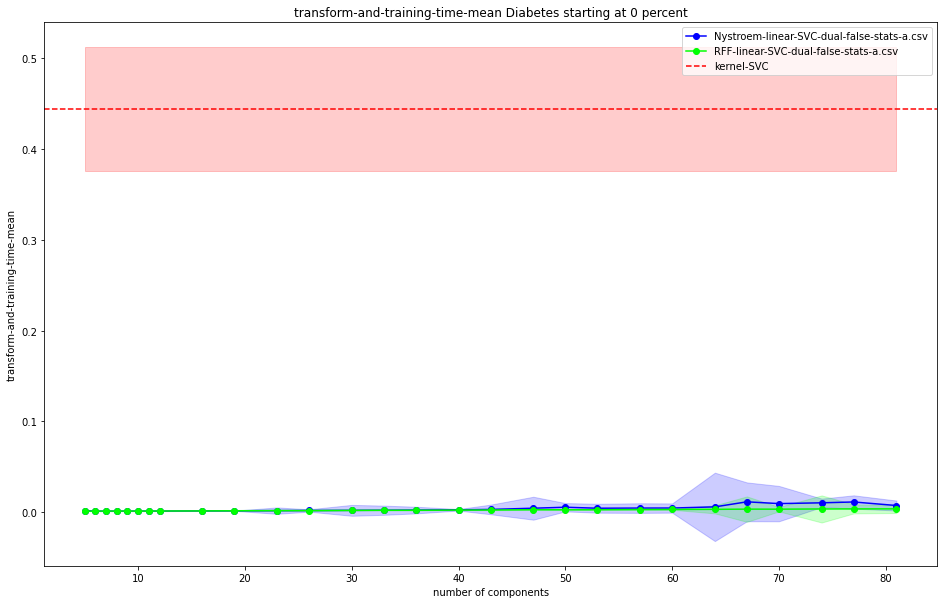

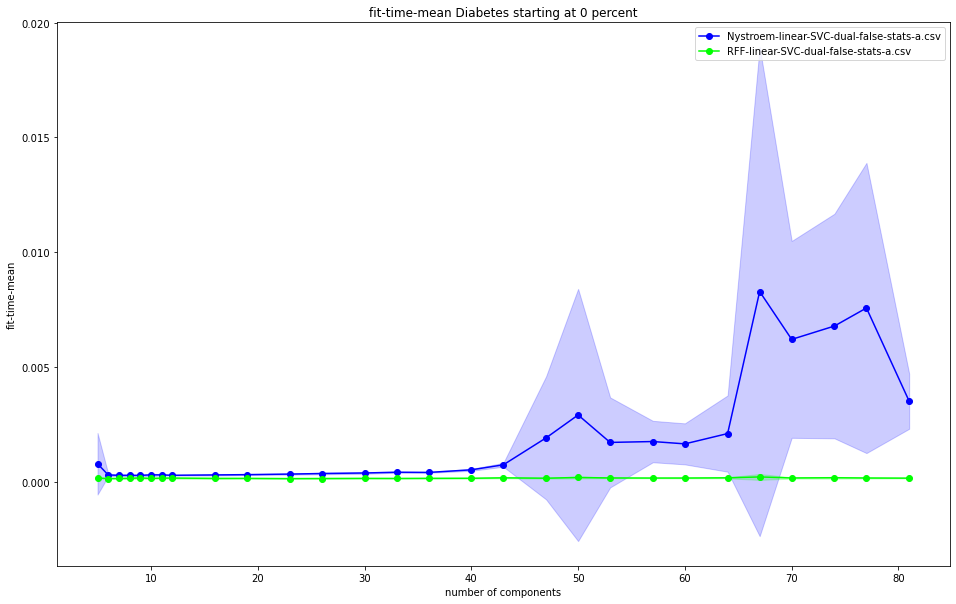

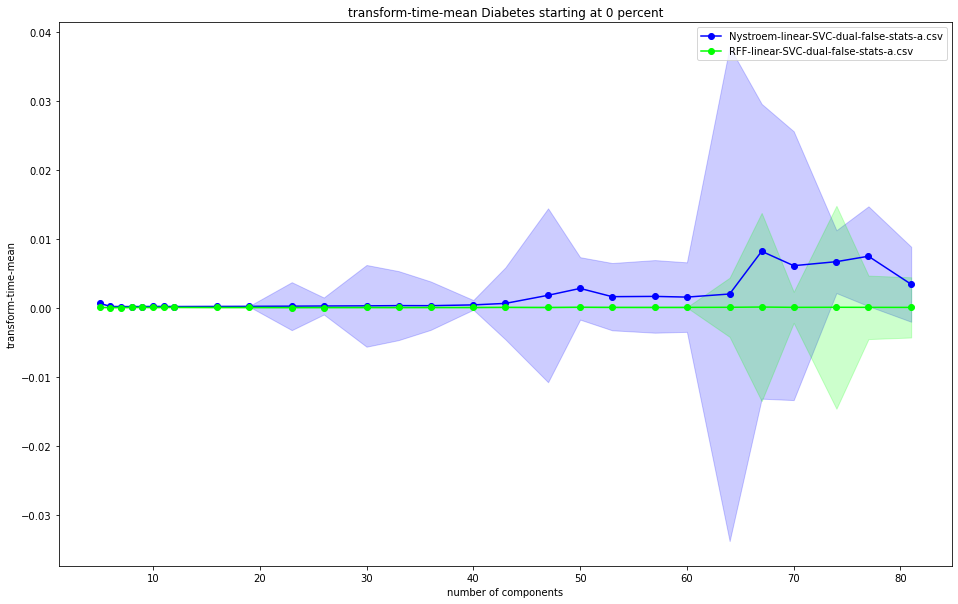

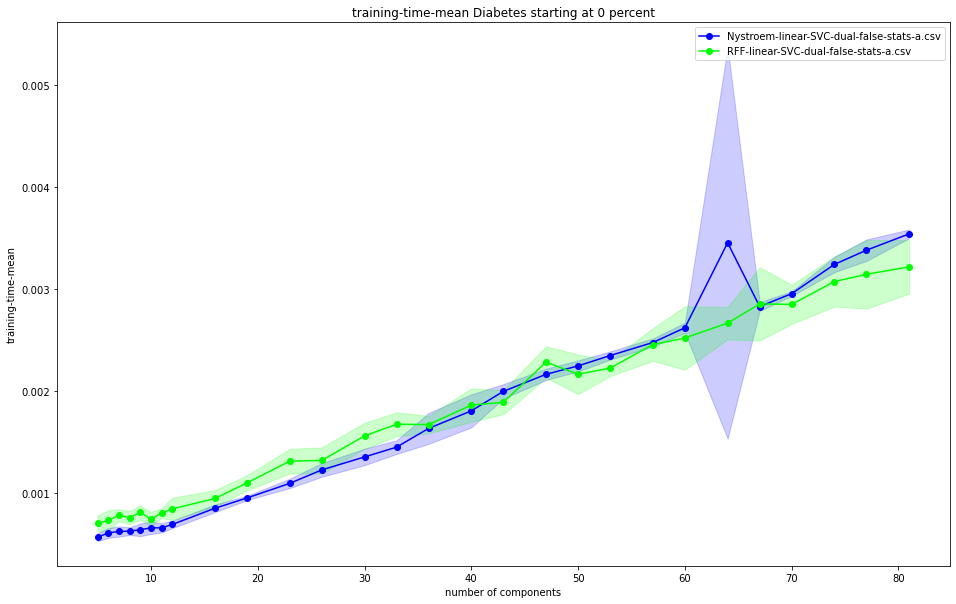

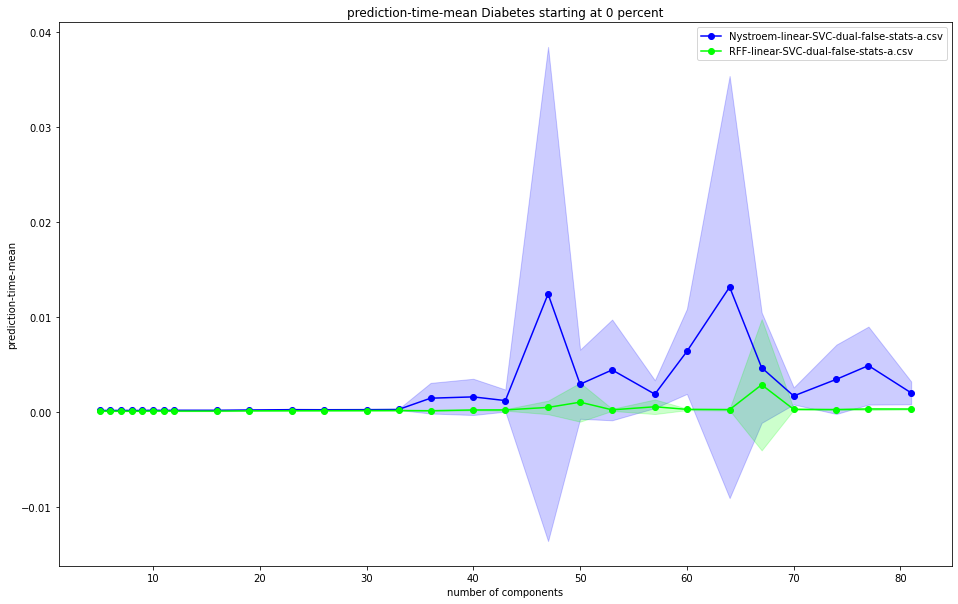

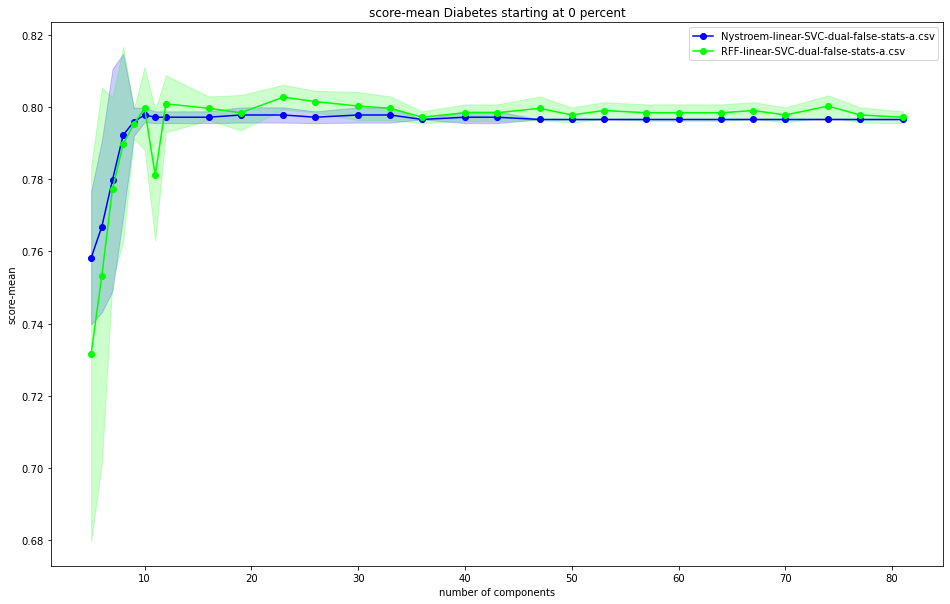

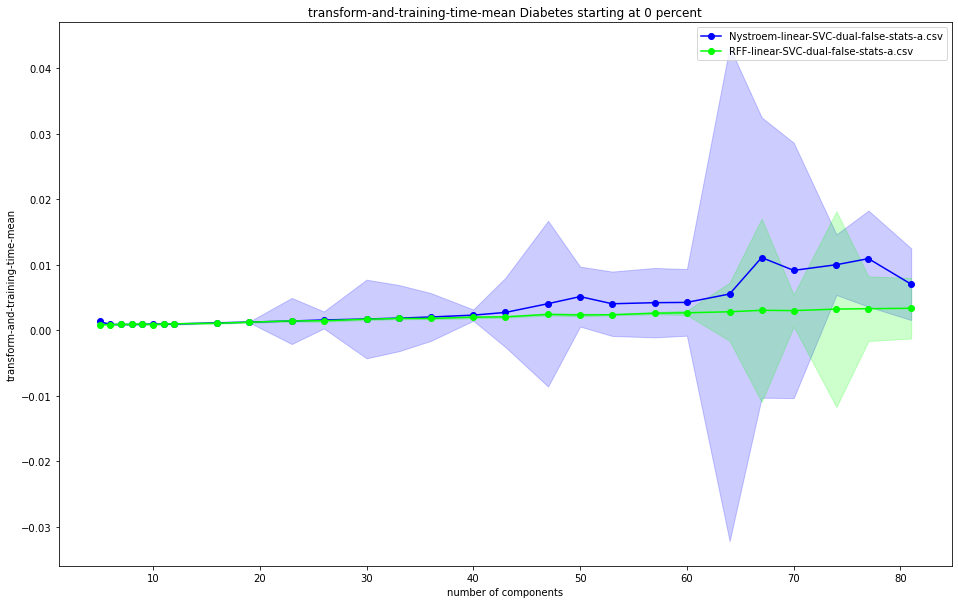

In [20]:

# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    if 'dual' in file or 'kernel-SVC' in file:
        # mean
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
        #data[percent_column] = data.apply(compute_percent, axis=1)
        data['File'] = file  # Add a column to identify the file 
        # 
        data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
        data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

        random_features_data = pd.concat([random_features_data, data], ignore_index=True)
        random_features_list.append(data)
        random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    if 'dual' in file or 'kernel-SVC' in file:
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

        data['File'] = file  # Add a column to identify the file
        data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
        data[total_training_time_mean_column] = data[training_time_mean_column]
        data[total_training_time_std_column] = data[training_time_std_column]

        kernel_data = pd.concat([kernel_data, data], ignore_index=True)
        kernel_list.append(data)
        kernel_list_names.append(file.replace('-stats.csv', ''))


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')
view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=[], constant_labels=[],
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')